# Recurrent Neural Network

We re building an lstm model, to predict the google stock price. we have split the data in train and test alredy, keeping a month's worth of data as a test set

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values # we jsut get the open price from the dataset

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
len(dataset_train)

1258

### Feature Scaling

Usually when using sigmoid function as the activation function at the output layer, it's recommended to apply **normalisation** to the data vs standardisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)) # default feature range
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled[:10]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259]])

### Creating a data structure with 60 timesteps and 1 output

At each timestep, the rnn is going to look back 60 timesteps and based on that is going to try to predict the next output. This 60 is chosen based on experimentation. Sices we don;t have weekends in the data (as stockmarket is close) this means 2 months of stock prices before the prediction

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258): # i'm starting at the 60th day, to be able to go back 60 days
    X_train.append(training_set_scaled[i-60:i, 0]) # append the 60 previous stock prices before the ith stock price
    y_train.append(training_set_scaled[i, 0]) # what we are trying to predict is the 60th stock price based on 0-59 stock range 
X_train, y_train = np.array(X_train), np.array(y_train) # turn to numpy arrays to apss to the network

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # add extra dimension to the xtrain

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Initialising the RNN

Sequential to add layers to the neural net

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

*return_sequences*: we use it when we stack lstm over lstm

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) # drop 20% of the neurons in the layer

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True)) #no input shape in the next layer as we have declared it in the previous layer (like 50 units)
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50)) #last lstm layer we don't return sequences
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0587
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0056
Epoch 5/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0050
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

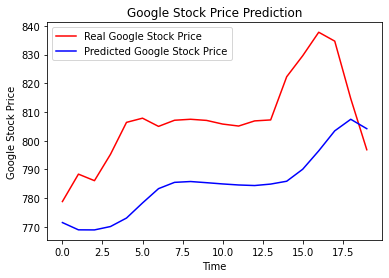

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()